Dataset : Student Alcohol Consumption

Description : This dataset containts social, gender and study data from secondary school students. The data were obtained in a survey of students math and portuguese language courses in secondary school. It contains a lot of interesting social, gender and study information about students. You can use it for some EDA or try to predict students final grade.

Contents : This datasets has many columns like school, sex, age, address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, schoolsup, famsup, paid, activities
nursery, higher, internet, romantic, famrel, freetime, goout, Dalc, Walc, health, absences, G1, G2, G3 (grades).

Dataset URL : https://www.kaggle.com/uciml/student-alcohol-consumption

Motivation : I found this dataset very fascinating as it contains many columns about students which say many things about their grades, performance, family and other factors related to thier personal life. I could find multiple stories from this dataset but as of now, I only want to focus over the performance of students. For this purpose, I found multiple parameters which I can use and they affect the performance of students for example address / alcohol consumption / Pstatus / Medu / Fedu / Mjob / Fjob / famsup / schoolsup.

Goal : I want to understand how these parameters are impacting performance of students and how students are progressing while dealing with these parameters in their life.

Proceedings : In terms of proceedings, First I am dividing this datasets based on the address field and getting data for 'rural' and 'urban' areas students.

After getting these two parts, I have started over the analysis with the help of 'Dalc' field which says how much amount of alcohol consumption is been regualrly taken by the students on the daily basis. I am trying to find out the impact of this consumption over their performance in exams.

Secondly, I find 'Pstatus' field is very important to analysis the same. This field tells that for how many students parents are seperated or living together. I thought this field can be very useful to analyse their performance as it is a very emotional / mind / time consuming matter for all the generation nowadays.

After these two fields, when I looked into in this datasets, then I reliaze that apart from the region, the education of parents and family support can also be good factors for affecting the performance of students. So I have also used these fields to get insights more about performance.

At the end, I have used school support and higher education field to get insight about how school helps students and what students think about their future as they are the one who will decide the future of nation.

Notes :

1. I have targetted only math class students for this analysis.
2. we have in total 395 rows approx in which 88 belogns to rural region and 307 belongs to urban.

In [2]:
# loading require libraries
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('student-mat.csv')

# dividing data into two sets based on address such as rural / urban
rural_data = data[data['address'] == 'R']
urban_data = data[data['address'] == 'U']

# Length of rural - 88 rows
# Length of urban - 307

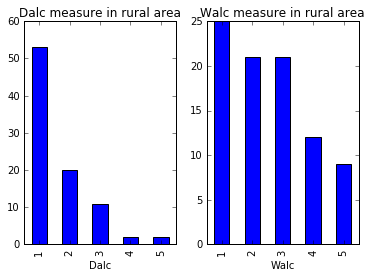

In [51]:
# Daily / Weekly consumption in rural areas

fig, ax = plt.subplots(1, 2)
rural_data.groupby(['Dalc']).size().plot(kind='bar', ax=ax[0], title='Dalc measure in rural area')
rural_data.groupby(['Walc']).size().plot(kind='bar', ax=ax[1], title='Walc measure in rural area')

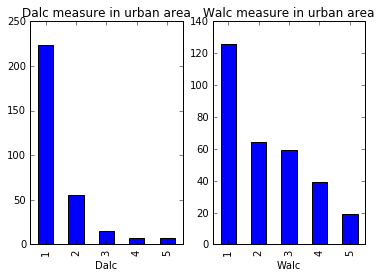

In [16]:
# Daily / Weekly consumption in urban areas

fig, ax = plt.subplots(1, 2)
urban_data.groupby(['Dalc']).size().plot(kind='bar', ax=ax[0], title='Dalc measure in urban area')
urban_data.groupby(['Walc']).size().plot(kind='bar', ax=ax[1], title='Walc measure in urban area')

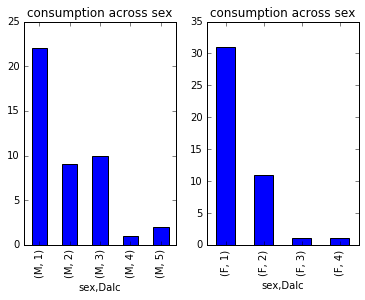

In [5]:
# Daily alcohol consumption across sex in rural areas

fig, ax = plt.subplots(1, 2)

rural_df = rural_data[['sex', 'Dalc']]
rural_df = rural_df[rural_df['sex'] == 'M']
rural_df.groupby(['sex', 'Dalc']).size().plot(kind='bar', ax=ax[0], title="consumption across sex")

rural_df = rural_data[['sex', 'Dalc']]
rural_df = rural_df[rural_df['sex'] == 'F']
rural_df.groupby(['sex', 'Dalc']).size().plot(kind='bar', ax=ax[1], title="consumption across sex")


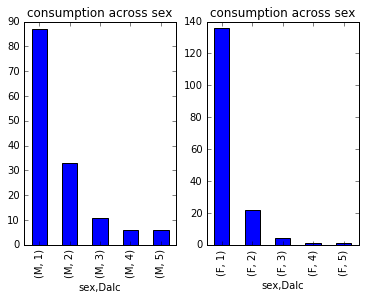

In [6]:
# Daily alcohol consumption across sex in urban areas

fig, ax = plt.subplots(1, 2)

urban_df = urban_data[['sex', 'Dalc']]
urban_df = urban_df[urban_df['sex'] == 'M']
urban_df.groupby(['sex', 'Dalc']).size().plot(kind='bar', ax=ax[0], title="consumption across sex")

urban_df = urban_data[['sex', 'Dalc']]
urban_df = urban_df[urban_df['sex'] == 'F']
urban_df.groupby(['sex', 'Dalc']).size().plot(kind='bar', ax=ax[1], title="consumption across sex")


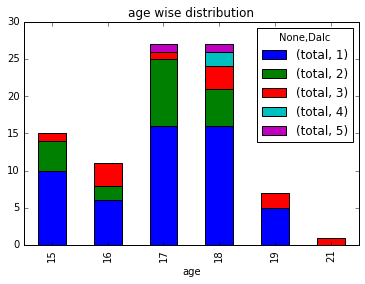

In [7]:
# age wise distribution of Daily consumption in rural areas

rural_df = rural_data[['age', 'Dalc']]
rural_df['total'] = 1
rural_df = rural_df.groupby(['age', 'Dalc']).sum().reset_index()
pd.pivot_table(rural_df, index=['age'], columns=['Dalc'], values=['total']).fillna(0).plot(kind='bar', stacked=True,
                                                                                          title="age wise distribution")

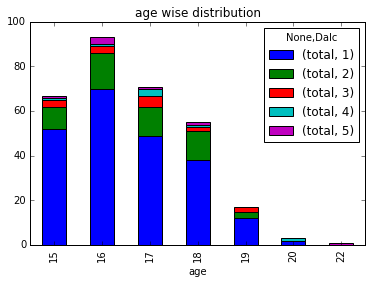

In [8]:
# age wise distribution of Daily consumption in urban areas

urban_df = urban_data[['age', 'Dalc']]
urban_df['total'] = 1
urban_df = urban_df.groupby(['age', 'Dalc']).sum().reset_index()
pd.pivot_table(urban_df, index=['age'], columns=['Dalc'], values=['total']).fillna(0).plot(kind='bar', stacked=True,
                                                                                          title="age wise distribution")

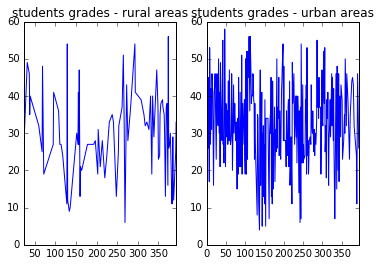

In [10]:
# total grades in rural and urban areas

fig, ax = plt.subplots(1, 2)

rural_df = rural_data[['G1', 'G2', 'G3']]
rural_df['total'] = rural_df.apply(sum, axis=1)
rural_df['total'].plot(ax=ax[0], title="students grades - rural areas")

urban_df = urban_data[['G1', 'G2', 'G3']]
urban_df['total'] = urban_df.apply(sum, axis=1)
urban_df['total'].plot(ax=ax[1], title="students grades - urban areas")


This analysis shows that how is the total grades are going for rural / urban areas students.
First thing which one can see that urban area chart is very dense and ofcourse it is because we have more data for urban areas students than rural areas.
Another thing, which one see that on an average urban areas students are more productive in terms of performance than rural areas students as average grade for rural areas students is 29.81 whereas for urban areas students it is
32.67.

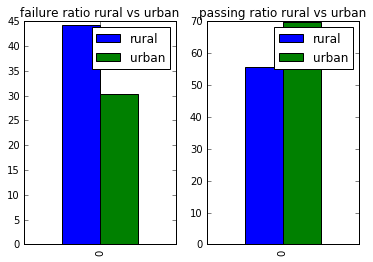

In [13]:
# past failures and passing ratios in rural and urban areas

fig, ax = plt.subplots(1, 2)

rural_failure_ratio = (1.0 * rural_data['failures'].sum()) / len(rural_data) * 100

urban_failure_ratio = (1.0 * urban_data['failures'].sum()) / len(urban_data) * 100

failure_df = pd.DataFrame({'rural' : [rural_failure_ratio,],
                           'urban' : [urban_failure_ratio,]})

rural_passing_ratio = (1 - (1.0 * rural_data['failures'].sum()) / len(rural_data)) * 100

urban_passing_ratio = (1 - (1.0 * urban_data['failures'].sum()) / len(urban_data)) * 100

passing_df = pd.DataFrame({'rural' : [rural_passing_ratio,],
                           'urban' : [urban_passing_ratio,]})


failure_df.plot(kind='bar', legend=True, ax=ax[0], title="failure ratio rural vs urban")

passing_df.plot(kind='bar', ax=ax[1], legend=True, title="passing ratio rural vs urban")

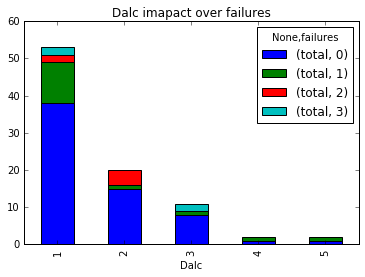

In [53]:
# impact of Dalc over failures in rural areas

rural_df = rural_data[['failures', 'Dalc']]
rural_df['total'] = 1
rural_df = rural_df.groupby(['Dalc', 'failures']).sum().reset_index()
pd.pivot_table(rural_df, index=['Dalc'], columns=['failures'], values=['total']).fillna(0).plot(kind='bar',
                                                                                                stacked=True,
                                                                                                title="Dalc imapact over failures")

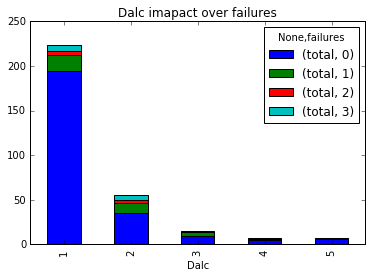

In [18]:
# impact of Dalc over failures in urban areas

urban_df = urban_data[['failures', 'Dalc']]
urban_df['total'] = 1
urban_df = urban_df.groupby(['Dalc', 'failures']).sum().reset_index()
pd.pivot_table(urban_df, index=['Dalc'], columns=['failures'], values=['total']).fillna(0).plot(kind='bar',
                                                                                                stacked=True,
                                                                                                title="Dalc imapact over failures")

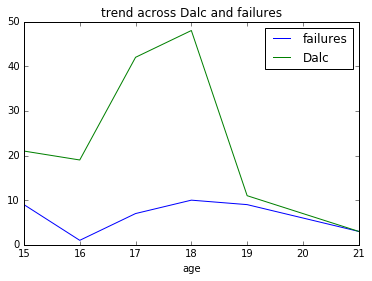

In [19]:
# trend across Dalc and failures in rural areas

rural_df = rural_data[['failures', 'age', 'Dalc']]
rural_df.groupby(['age']).sum().plot(title="trend across Dalc and failures")

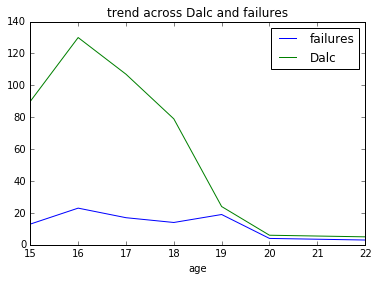

In [20]:
# trend across Dalc and failures in urban areas

urban_df = urban_data[['failures', 'age', 'Dalc']]
urban_df.groupby(['age']).sum().plot(title="trend across Dalc and failures")

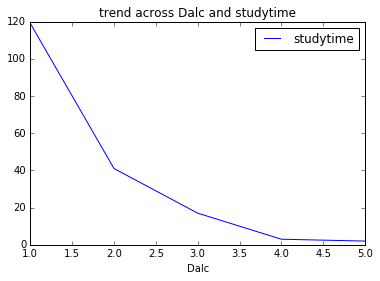

In [21]:
# trend across Dalc and studytime in rural areas

rural_df = rural_data[['studytime', 'Dalc']]
rural_df.groupby(['Dalc']).sum().plot(title="trend across Dalc and studytime")

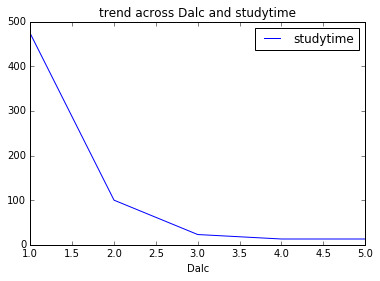

In [22]:
# trend across Dalc and studytime in urban areas

urban_df = urban_data[['studytime', 'Dalc']]
urban_df.groupby(['Dalc']).sum().plot(title="trend across Dalc and studytime")

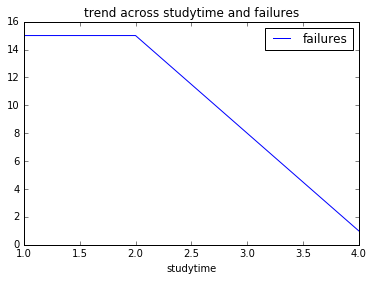

In [23]:
# trend across studytime and failures in rural areas

rural_df = rural_data[['studytime', 'failures']]
rural_df.groupby(['studytime']).sum().plot(title="trend across studytime and failures")

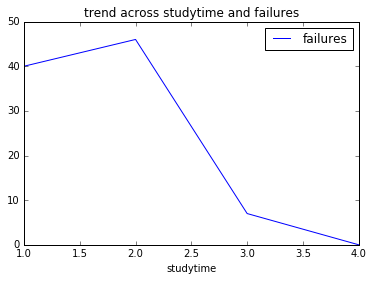

In [24]:
# trend across studytime and failures in urban areas

urban_df = urban_data[['studytime', 'failures']]
urban_df.groupby(['studytime']).sum().plot(title="trend across studytime and failures")

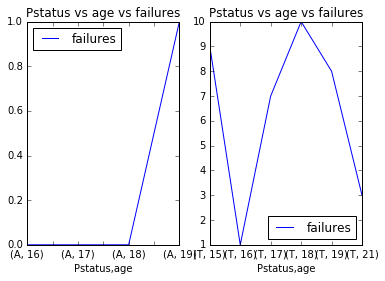

In [25]:
## lets focus over support for education now from parents / school
## using Pstatus field here to show impact of this over performance
## rural areas

fig, ax = plt.subplots(1, 2)
rural_df = rural_data[['Pstatus', 'failures', 'age']]
rural_df_A = rural_df[rural_df['Pstatus'] == 'A']
rural_df_A.groupby(['Pstatus', 'age']).sum().plot(ax=ax[0], title="Pstatus vs age vs failures")

rural_df_T = rural_df[rural_df['Pstatus'] == 'T']
rural_df_T.groupby(['Pstatus', 'age']).sum().plot(ax=ax[1], title="Pstatus vs age vs failures")

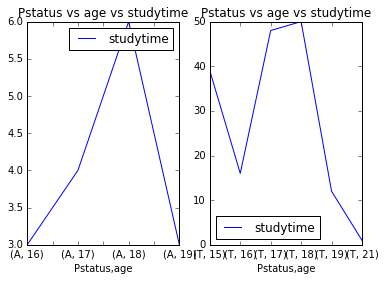

In [26]:
## lets focus over support for education now from parents / school
## using Pstatus field here to show impact of this over performance
## rural areas

fig, ax = plt.subplots(1, 2)
rural_df = rural_data[['Pstatus', 'studytime', 'age']]
rural_df_A = rural_df[rural_df['Pstatus'] == 'A']
rural_df_A.groupby(['Pstatus', 'age']).sum().plot(ax=ax[0], title="Pstatus vs age vs studytime")

rural_df_T = rural_df[rural_df['Pstatus'] == 'T']
rural_df_T.groupby(['Pstatus', 'age']).sum().plot(ax=ax[1], title="Pstatus vs age vs studytime")

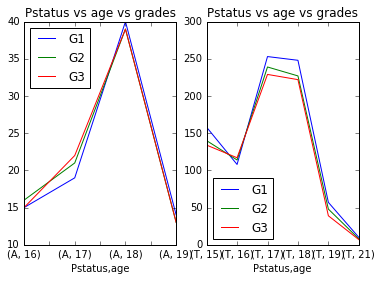

In [27]:
## lets focus over support for education now from parents / school
## using Pstatus field here to show impact of this over performance
## rural areas

fig, ax = plt.subplots(1, 2)
rural_df = rural_data[['Pstatus', 'G1', 'G2', 'G3', 'age']]

rural_df_A = rural_df[rural_df['Pstatus'] == 'A']
rural_df_A.groupby(['Pstatus', 'age']).sum().plot(ax=ax[0], title="Pstatus vs age vs grades")

rural_df_T = rural_df[rural_df['Pstatus'] == 'T']
rural_df_T.groupby(['Pstatus', 'age']).sum().plot(ax=ax[1], title="Pstatus vs age vs grades")

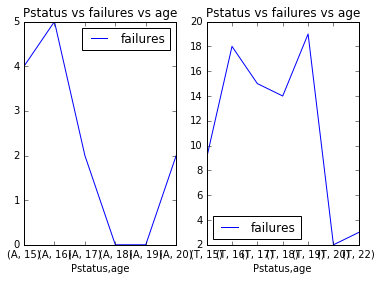

In [28]:
## lets focus over support for education now from parents / school
## using Pstatus field here to show impact of this over performance
## urban areas

fig, ax = plt.subplots(1, 2)
urban_df = urban_data[['Pstatus', 'failures', 'age']]
urban_df_A = urban_df[urban_df['Pstatus'] == 'A']
urban_df_A.groupby(['Pstatus', 'age']).sum().plot(ax=ax[0], title="Pstatus vs failures vs age")

urban_df_T = urban_df[urban_df['Pstatus'] == 'T']
urban_df_T.groupby(['Pstatus', 'age']).sum().plot(ax=ax[1], title="Pstatus vs failures vs age")

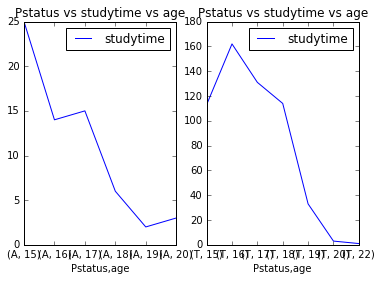

In [29]:
## lets focus over support for education now from parents / school
## using Pstatus field here to show impact of this over performance
## urban areas

fig, ax = plt.subplots(1, 2)

urban_df = urban_data[['Pstatus', 'studytime', 'age']]
urban_df_A = urban_df[urban_df['Pstatus'] == 'A']
urban_df_A.groupby(['Pstatus', 'age']).sum().plot(ax=ax[0], title="Pstatus vs studytime vs age")

urban_df_T = urban_df[urban_df['Pstatus'] == 'T']
urban_df_T.groupby(['Pstatus', 'age']).sum().plot(ax=ax[1], title="Pstatus vs studytime vs age")

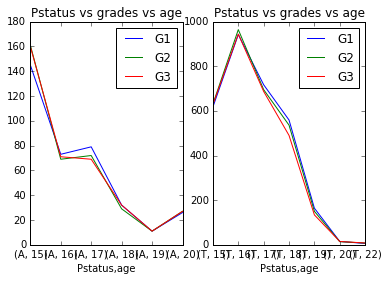

In [30]:
## lets focus over support for education now from parents / school
## using Pstatus field here to show impact of this over performance
## urban areas

fig, ax = plt.subplots(1, 2)
urban_df = urban_data[['Pstatus', 'G1', 'G2', 'G3', 'age']]

urban_df_A = urban_df[urban_df['Pstatus'] == 'A']
urban_df_A.groupby(['Pstatus', 'age']).sum().plot(ax=ax[0], title="Pstatus vs grades vs age")

urban_df_T = urban_df[urban_df['Pstatus'] == 'T']
urban_df_T.groupby(['Pstatus', 'age']).sum().plot(ax=ax[1], title="Pstatus vs grades vs age")

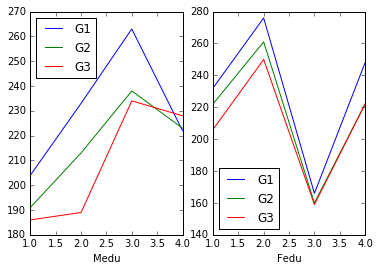

In [31]:
## lets focus over support for education now from parents / school
## using Medu / Fedu field here to show impact of this over performance
## rural areas

fig, ax = plt.subplots(1, 2)

rural_df = rural_data[['Medu', 'G1', 'G2', 'G3']]
rural_df.groupby(['Medu']).sum().plot(ax=ax[0], legend=True, title="Medu vs grades")

rural_df = rural_data[['Fedu', 'G1', 'G2', 'G3']]
rural_df.groupby(['Fedu']).sum().plot(ax=ax[1], legend=True, title="Medu vs grades")


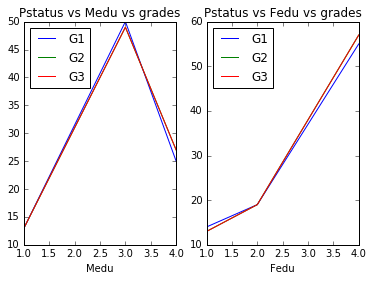

In [32]:
## lets focus over support for education now from parents / school
## using Pstatus / Medu / Fedu field here to show impact of this over performance
## rural areas


fig, ax = plt.subplots(1, 2)
rural_df = rural_data[['Pstatus', 'Medu', 'G1', 'G2', 'G3']]
rural_df_A = rural_df[rural_df['Pstatus'] == 'A']
rural_df_A.groupby(['Medu']).sum().plot(ax=ax[0], legend=True, title="Pstatus vs Medu vs grades")

rural_df = rural_data[['Pstatus', 'Fedu', 'G1', 'G2', 'G3']]
rural_df_A = rural_df[rural_df['Pstatus'] == 'A']
rural_df_A.groupby(['Fedu']).sum().plot(ax=ax[1], legend=True, title="Pstatus vs Fedu vs grades")

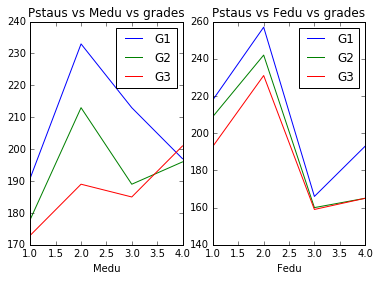

In [33]:
## lets focus over support for education now from parents / school
## using Pstatus / Medu / Fedu field here to show impact of this over performance
## rural areas


fig, ax = plt.subplots(1, 2)


rural_df = rural_data[['Pstatus', 'Medu', 'G1', 'G2', 'G3']]
rural_df_T = rural_df[rural_df['Pstatus'] == 'T']
rural_df_T.groupby(['Medu']).sum().plot(ax=ax[0], legend=True, title="Pstaus vs Medu vs grades")

rural_df = rural_data[['Pstatus', 'Fedu', 'G1', 'G2', 'G3']]
rural_df_T = rural_df[rural_df['Pstatus'] == 'T']
rural_df_T.groupby(['Fedu']).sum().plot(ax=ax[1], legend=True, title="Pstaus vs Fedu vs grades")

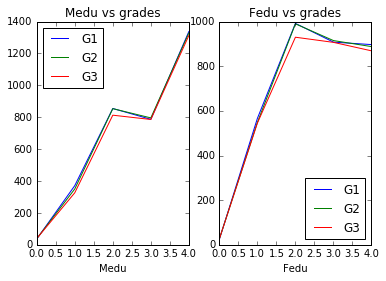

In [34]:
## lets focus over support for education now from parents / school
## using Medu / Fedu field here to show impact of this over performance
## urban areas

fig, ax = plt.subplots(1, 2)

urban_df = urban_data[['Medu', 'G1', 'G2', 'G3']]
urban_df.groupby(['Medu']).sum().plot(ax=ax[0], legend=True, title="Medu vs grades")

urban_df = urban_data[['Fedu', 'G1', 'G2', 'G3']]
urban_df.groupby(['Fedu']).sum().plot(ax=ax[1], legend=True, title="Fedu vs grades")


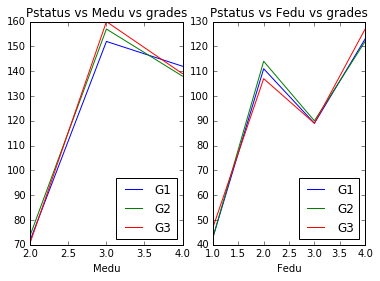

In [35]:
## lets focus over support for education now from parents / school
## using Pstatus / Medu / Fedu field here to show impact of this over performance
## urban areas

fig, ax = plt.subplots(1, 2)

urban_df = urban_data[['Pstatus', 'Medu', 'G1', 'G2', 'G3']]
urban_df_A = urban_df[urban_df['Pstatus'] == 'A']
urban_df_A.groupby(['Medu']).sum().plot(ax=ax[0], legend=True, title="Pstatus vs Medu vs grades")

urban_df = urban_data[['Pstatus', 'Fedu', 'G1', 'G2', 'G3']]
urban_df_A = urban_df[urban_df['Pstatus'] == 'A']
urban_df_A.groupby(['Fedu']).sum().plot(ax=ax[1], legend=True, title="Pstatus vs Fedu vs grades")

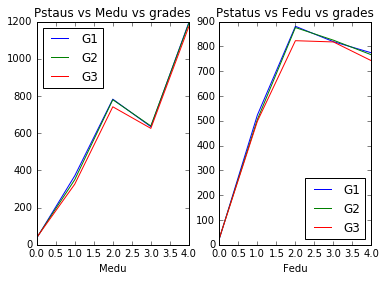

In [36]:
## lets focus over support for education now from parents / school
## using Pstatus / Medu / Fedu field here to show impact of this over performance
## urban areas

fig, ax = plt.subplots(1, 2)


urban_df = urban_data[['Pstatus', 'Medu', 'G1', 'G2', 'G3']]
urban_df_T = urban_df[urban_df['Pstatus'] == 'T']
urban_df_T.groupby(['Medu']).sum().plot(ax=ax[0], legend=True, title="Pstaus vs Medu vs grades")

urban_df = urban_data[['Pstatus', 'Fedu', 'G1', 'G2', 'G3']]
urban_df_T = urban_df[urban_df['Pstatus'] == 'T']
urban_df_T.groupby(['Fedu']).sum().plot(ax=ax[1], legend=True, title="Pstatus vs Fedu vs grades")

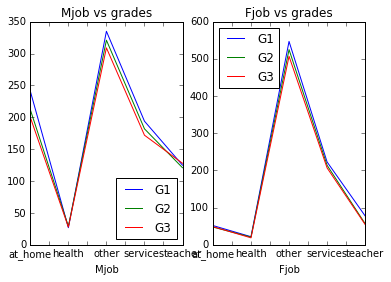

In [37]:
## lets focus over support for education now from parents / school
## using Mjob / Fjob field here to show impact of this over performance
## rural areas


fig, ax = plt.subplots(1, 2)

rural_df = rural_data[['Mjob', 'G1', 'G2', 'G3']]
rural_df.groupby(['Mjob']).sum().plot(ax=ax[0], legend=True, title="Mjob vs grades")

rural_df = rural_data[['Fjob', 'G1', 'G2', 'G3']]
rural_df.groupby(['Fjob']).sum().plot(ax=ax[1], legend=True, title="Fjob vs grades")


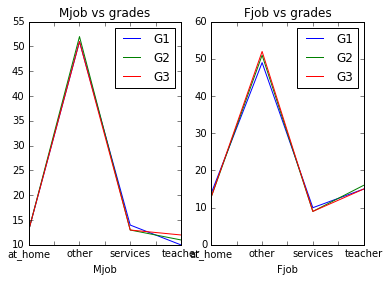

In [38]:
## lets focus over support for education now from parents / school
## using Mjob / Fjob field here to show impact of this over performance
## urban areas

fig, ax = plt.subplots(1, 2)
rural_df = rural_data[['Pstatus', 'Mjob', 'G1', 'G2', 'G3']]
rural_df_A = rural_df[rural_df['Pstatus'] == 'A']
rural_df_A.groupby(['Mjob']).sum().plot(ax=ax[0], legend=True, title="Mjob vs grades")

rural_df = rural_data[['Pstatus', 'Fjob', 'G1', 'G2', 'G3']]
rural_df_A = rural_df[rural_df['Pstatus'] == 'A']
rural_df_A.groupby(['Fjob']).sum().plot(ax=ax[1], legend=True, title="Fjob vs grades")

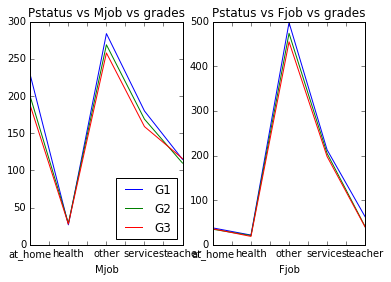

In [39]:
## lets focus over support for education now from parents / school
## using Pstatus Mjob / Fjob field here to show impact of this over performance
## rural areas

fig, ax = plt.subplots(1, 2)
rural_df = rural_data[['Pstatus', 'Mjob', 'G1', 'G2', 'G3']]
rural_df_A = rural_df[rural_df['Pstatus'] == 'T']
rural_df_A.groupby(['Mjob']).sum().plot(ax=ax[0], legend=True, title="Pstatus vs Mjob vs grades")

rural_df = rural_data[['Pstatus', 'Fjob', 'G1', 'G2', 'G3']]
rural_df_A = rural_df[rural_df['Pstatus'] == 'T']
rural_df_A.groupby(['Fjob']).sum().plot(ax=ax[1], legend=False, title="Pstatus vs Fjob vs grades")

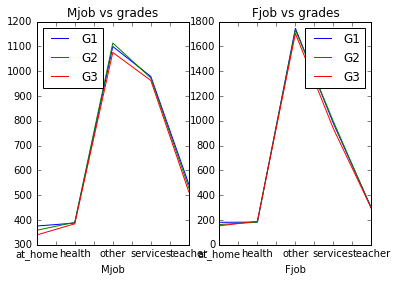

In [40]:
## lets focus over support for education now from parents / school
## using Mjob / Fjob field here to show impact of this over performance
## urban areas

fig, ax = plt.subplots(1, 2)

urban_df = urban_data[['Mjob', 'G1', 'G2', 'G3']]
urban_df.groupby(['Mjob']).sum().plot(ax=ax[0], legend=True, title="Mjob vs grades")

urban_df = urban_data[['Fjob', 'G1', 'G2', 'G3']]
urban_df.groupby(['Fjob']).sum().plot(ax=ax[1], legend=True, title="Fjob vs grades")


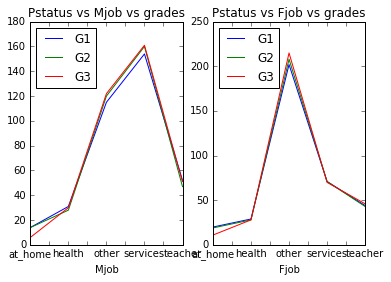

In [41]:
## lets focus over support for education now from parents / school
## using Pstatus Mjob / Fjob field here to show impact of this over performance
## urban areas

fig, ax = plt.subplots(1, 2)

urban_df = urban_data[['Pstatus', 'Mjob', 'G1', 'G2', 'G3']]
urban_df_A = urban_df[urban_df['Pstatus'] == 'A']
urban_df_A.groupby(['Mjob']).sum().plot(ax=ax[0], legend=True, title="Pstatus vs Mjob vs grades")

urban_df = urban_data[['Pstatus', 'Fjob', 'G1', 'G2', 'G3']]
urban_df_A = urban_df[urban_df['Pstatus'] == 'A']
urban_df_A.groupby(['Fjob']).sum().plot(ax=ax[1], legend=True, title="Pstatus vs Fjob vs grades")

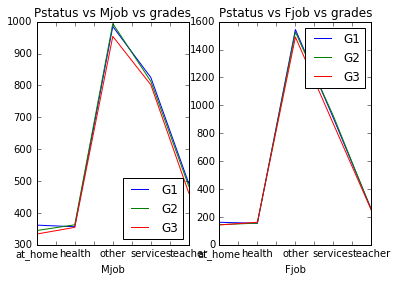

In [42]:
## lets focus over support for education now from parents / school
## using Pstatus Mjob / Fjob field here to show impact of this over performance
## urban areas

fig, ax = plt.subplots(1, 2)

urban_df = urban_data[['Pstatus', 'Mjob', 'G1', 'G2', 'G3']]
urban_df_A = urban_df[urban_df['Pstatus'] == 'T']
urban_df_A.groupby(['Mjob']).sum().plot(ax=ax[0], legend=True, title="Pstatus vs Mjob vs grades")

urban_df = urban_data[['Pstatus', 'Fjob', 'G1', 'G2', 'G3']]
urban_df_A = urban_df[urban_df['Pstatus'] == 'T']
urban_df_A.groupby(['Fjob']).sum().plot(ax=ax[1], legend=True, title="Pstatus vs Fjob vs grades")

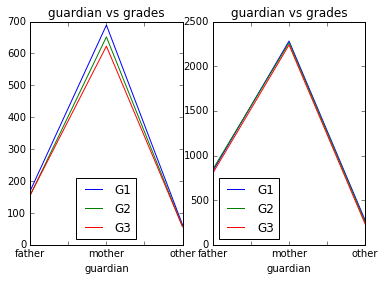

In [44]:
## lets focus over support for education now from parents / school
## using guardian field here to show impact of this over performance
## rural areas / urban areas

fig, ax  = plt.subplots(1, 2)

rural_df = rural_data[['guardian', 'G1', 'G2', 'G3']]
rural_df.groupby(['guardian']).sum().plot(ax=ax[0], title="guardian vs grades", legend=True)

urban_df = urban_data[['guardian', 'G1', 'G2', 'G3']]
urban_df.groupby(['guardian']).sum().plot(ax=ax[1], title="guardian vs grades", legend=True)

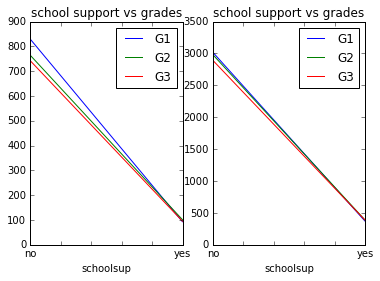

In [45]:
## lets focus over support for education now from parents / school
## using school support field here to show impact of this over performance
## rural areas / urban areas

fig, ax  = plt.subplots(1, 2)

rural_df = rural_data[['schoolsup', 'G1', 'G2', 'G3']]
rural_df.groupby(['schoolsup']).sum().plot(ax=ax[0], title="school support vs grades")

urban_df = urban_data[['schoolsup', 'G1', 'G2', 'G3']]
urban_df.groupby(['schoolsup']).sum().plot(ax=ax[1], title="school support vs grades")

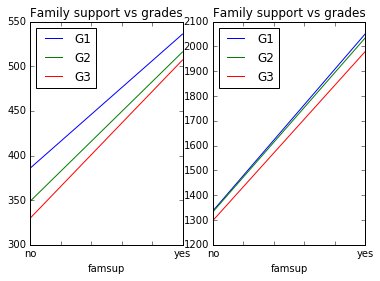

In [46]:
## lets focus over support for education now from parents / school
## using family support field here to show impact of this over performance
## rural areas / urban areas

fig, ax  = plt.subplots(1, 2)

rural_df = rural_data[['famsup', 'G1', 'G2', 'G3']]
rural_df.groupby(['famsup']).sum().plot(ax=ax[0], title="Family support vs grades")

urban_df = urban_data[['famsup', 'G1', 'G2', 'G3']]
urban_df.groupby(['famsup']).sum().plot(ax=ax[1], title="Family support vs grades")

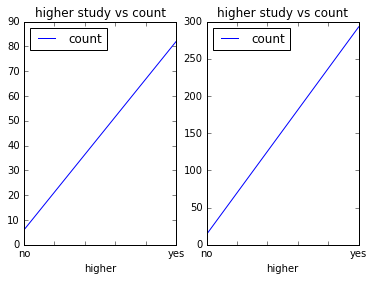

In [47]:
## lets focus over support for education now from parents / school
## using higher field here to show impact of this over performance
## rural areas / urban areas

fig, ax  = plt.subplots(1, 2)

rural_df = rural_data[['higher']]
rural_df['count'] = 1
rural_df.groupby(['higher']).sum().plot(ax=ax[0], title="higher study vs count")

urban_df = urban_data[['higher']]
urban_df['count'] = 1
urban_df.groupby(['higher']).sum().plot(ax=ax[1], title="higher study vs count")

Conclusion : Although there is less data for rural and urban areas but if one take a fine look over the analysis then one can easily understand that students are performing almost equal in terms of grades from both the regions.

2. Apart from it by looking at Dalc age wise distribution and failures / studytime trend line, one can easily understand that from 16th - 18th age of students are more likely aligned towards alcohol consumption and hence their performance is low than others in exams.

3. By looking trendlines of parents education and their professions, one can see the impact of these fields over past failures and studytime of students and Pstatus also impacts the performance which one can measure looking at failures / studytime trendlines.

These are the analysis I could able to perform so far. This is my first analysis so I can be wrong somewhere, please try to look at it and let me know your views which can help me to improve myself.